In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
from sklearn.metrics import accuracy_score, recall_score, precision_score , confusion_matrix
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading data
df=pd.read_csv("/Users/ahmedbinnayeem/Downloads/stroke_data.csv")

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# dropping id column

df.drop('id', axis = 1, inplace = True)

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
a = df["bmi"].mean()
b = df['bmi'].median()
c = df['bmi'].mode()[0]
print(a,b,c)

28.893236911794666 28.1 28.7


In [12]:
df["bmi"]=df["bmi"].fillna(28.9)

In [13]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
 # Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [15]:
# Looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

gender has ['Male' 'Female' 'Other'] values

ever_married has ['Yes' 'No'] values

work_type has ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] values

Residence_type has ['Urban' 'Rural'] values

smoking_status has ['formerly smoked' 'never smoked' 'smokes' 'Unknown'] values



In [16]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other':2 })
df['gender'] = pd.to_numeric(df['gender'], errors='coerce')


In [17]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes':1 })
df['ever_married'] = pd.to_numeric(df['ever_married'], errors='coerce')

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,Rural,202.21,28.9,never smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [20]:
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4  })
df['work_type'] = pd.to_numeric(df['work_type'], errors='coerce')


In [21]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,1,Rural,202.21,28.9,never smoked,1
2,0,80.0,0,1,1,0,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,0,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,1,Rural,174.12,24.0,never smoked,1


In [22]:

df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban':1 })
df['Residence_type'] = pd.to_numeric(df['Residence_type'], errors='coerce')

In [23]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,1,0,202.21,28.9,never smoked,1
2,0,80.0,0,1,1,0,0,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,0,1,171.23,34.4,smokes,1
4,1,79.0,1,0,1,1,0,174.12,24.0,never smoked,1


In [24]:

df['smoking_status'] = df['smoking_status'].map({ 'formerly smoked':0, 'never smoked':1, 'smokes':2 , 'Unknown':3 })
df['smoking_status'] = pd.to_numeric(df['smoking_status'], errors='coerce')

In [25]:
df.head() #smoking_status has ['formerly smoked' 'never smoked' 'smokes' 'Unknown'] values

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,1,61.0,0,0,1,1,0,202.21,28.9,1,1
2,0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1,79.0,1,0,1,1,0,174.12,24.0,1,1


In [26]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Exploratory Data Analysis

Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [28]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,28.9
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0


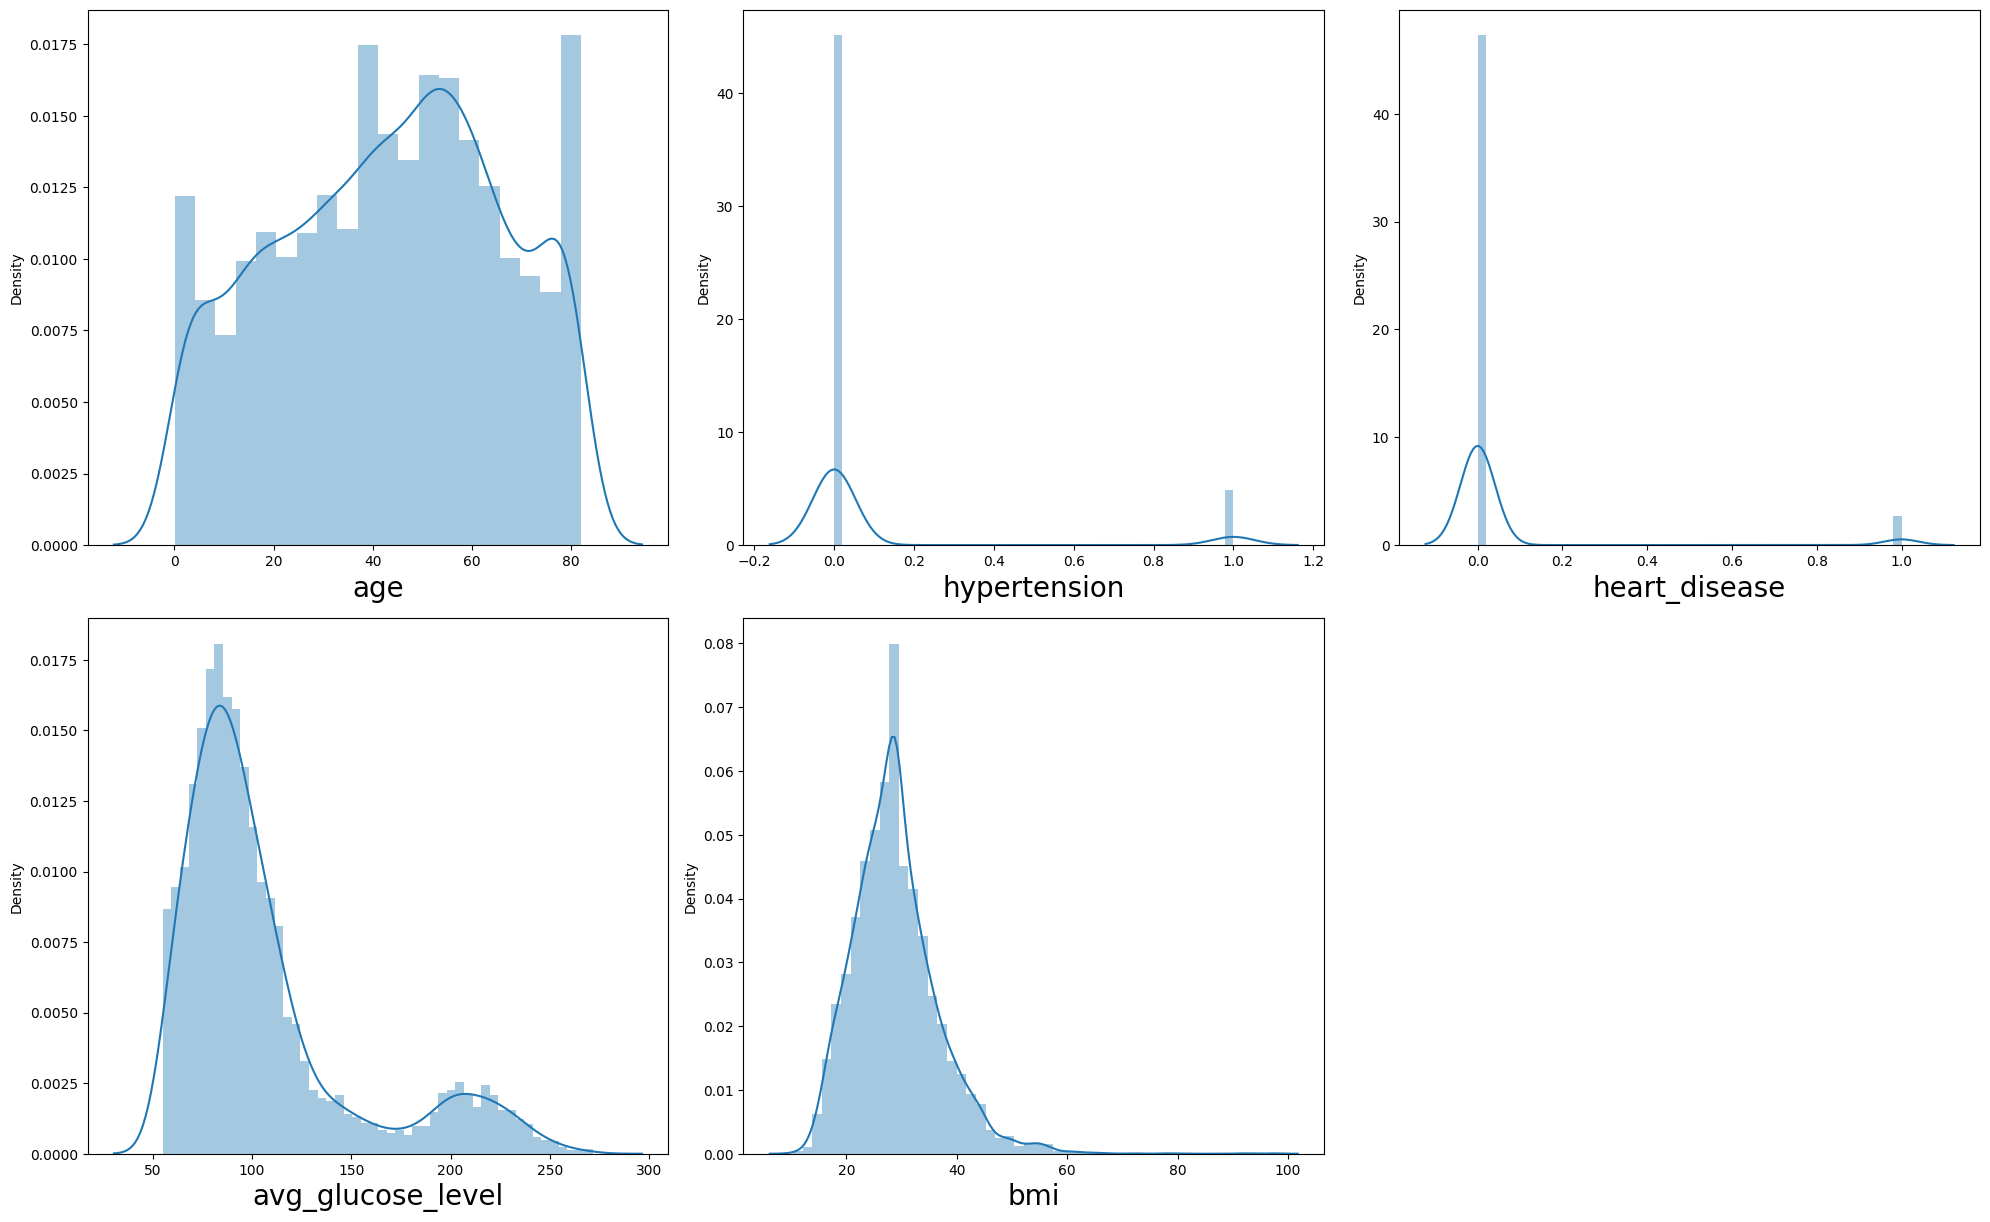

In [29]:
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

(5110, 11)

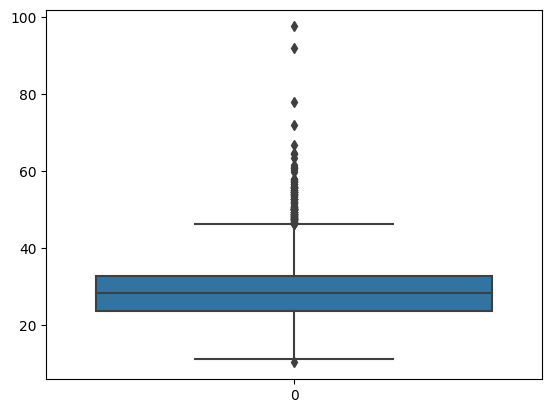

In [30]:
sns.boxplot(df['bmi'])
df.shape

In [31]:
X = df.drop("stroke", axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,0,1,228.69,36.6,0
1,1,61.0,0,0,1,1,0,202.21,28.9,1
2,0,80.0,0,1,1,0,0,105.92,32.5,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2
4,1,79.0,1,0,1,1,0,174.12,24.0,1


<Axes: >

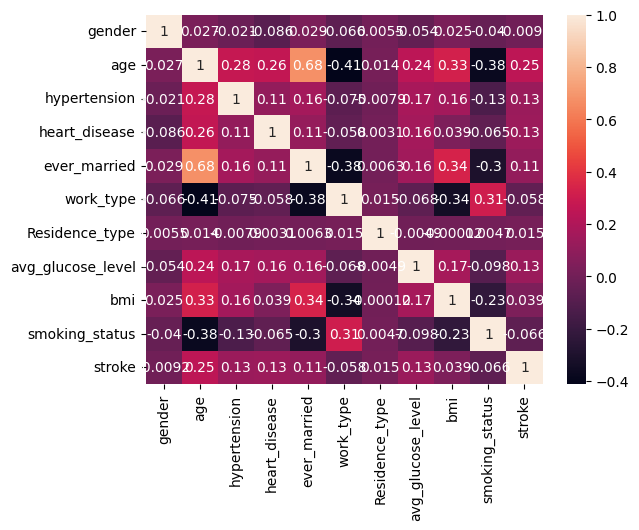

In [32]:
## # Correlation between features and target
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

In [33]:
df.head(5)
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

# Split dataset into train and test

In [34]:
y=df["stroke"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [36]:
len(X_train), len(X_test)

(4088, 1022)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
y.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy = 'minority')
X_sm,y_sm = oversample.fit_resample(X,y)


In [40]:
y.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [41]:
y_sm.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state=42, stratify=y_sm)

In [43]:
y_train.value_counts()

stroke
1    3889
0    3888
Name: count, dtype: int64

In [44]:
y_test.value_counts()

stroke
0    973
1    972
Name: count, dtype: int64

# LogisticRegression()

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression Model:",LogisticRegressionScore*100)

from sklearn.metrics import confusion_matrix, classification_report

y_pred_lr = lr.predict(X_test)

Accuracy obtained by Logistic Regression Model: 79.84575835475579


In [47]:
 # Classification report of Logistic Regression
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       973
           1       0.79      0.81      0.80       972

    accuracy                           0.80      1945
   macro avg       0.80      0.80      0.80      1945
weighted avg       0.80      0.80      0.80      1945



# KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [49]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier Model:",KNeighborsClassifierScore*100)

y_pred_knn = knn.predict(X_test)

Accuracy obtained by K Neighbors Classifier Model: 91.05398457583547


In [50]:
 # Classification report of K Neighbors Classifier
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       973
           1       0.87      0.96      0.92       972

    accuracy                           0.91      1945
   macro avg       0.92      0.91      0.91      1945
weighted avg       0.92      0.91      0.91      1945



# RandomForestClassifier()

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier Model:",RandomForestClassifierScore*100)

y_pred_rfc = rfc.predict(X_test)

Accuracy obtained by Random Forest Classifier Model: 92.95629820051414


In [53]:
 # Classification report of Random Forest Classifier for Brain Stroke Prediction
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       973
           1       0.91      0.95      0.93       972

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



# GradientBoostingClassifier()

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [55]:
GradientBoostingClassifierScore = gb.score(X_test, y_test)
print("Accuracy obtained by Gradient Boosting Classifier Model:",GradientBoostingClassifierScore*100)

y_pred_gb = gb.predict(X_test)

Accuracy obtained by Gradient Boosting Classifier Model: 86.63239074550128


In [56]:
 # Classification report of Gradient Boosting Classifier
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       973
           1       0.85      0.89      0.87       972

    accuracy                           0.87      1945
   macro avg       0.87      0.87      0.87      1945
weighted avg       0.87      0.87      0.87      1945



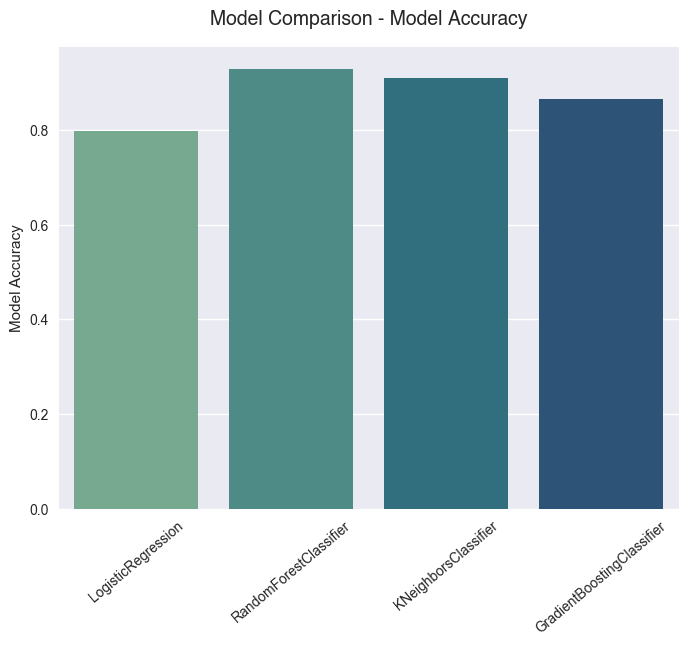

In [57]:
plt.style.use("seaborn")

x=["LogisticRegression", "RandomForestClassifier", 
   "KNeighborsClassifier","GradientBoostingClassifier"]

y=[LogisticRegressionScore,RandomForestClassifierScore,
  KNeighborsClassifierScore,GradientBoostingClassifierScore]

fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x=x, y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03);

# Making the Predictive System

In [58]:
input_data = (0,67.0,0,1,1,0,1,228.69,36.6,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The person is prone to brain stroke ')
else:
  print('The person is not prone to brain stroke ')

[1]
The person is prone to brain stroke 


# Saving the trained model

In [59]:
import pickle

In [60]:
filename = 'stroke_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [61]:
#loading the saved model
loaded_model = pickle.load(open('stroke_model.sav', 'rb'))

In [62]:
input_data = (0,67.0,0,1,1,0,1,228.69,36.6,0)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The person is prone to brain stroke')
else:
  print('The person is not prone to brain stroke ')

[1]
The person is prone to brain stroke


import matplotlib.pyplot as plt

# Classification report for algorithm 1
algo1_report = {'precision': [0.2, 0.6, 0.9],
                'recall': [0.8, 0.5, 0.1],
                'f1-score': [0.75, 0.84, 0.78]}

# Classification report for algorithm 2
algo2_report = {'precision': [0.7, 0.8, 0.6],
                'recall': [0.8, 0.7, 0.9],
                'f1-score': [0.74, 0.74, 0.7]}

# Classification report for algorithm 3
algo3_report = {'precision': [0.9, 0.8, 0.7],
                'recall': [0.6, 0.8, 0.9],
                'f1-score': [0.71, 0.79, 0.78]}

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
x = ['precision', 'recall', 'f1-score']
bar_width = 0.2
opacity = 0.8

# Set the positions of the bars on the x-axis
pos1 = list(range(len(x)))
pos2 = [x + bar_width for x in pos1]
pos3 = [x + bar_width for x in pos2]

# Plot the bars for each algorithm
ax.bar(pos1, algo1_report['precision'], bar_width, alpha=opacity, label='Algorithm 1')
ax.bar(pos2, algo2_report['precision'], bar_width, alpha=opacity, label='Algorithm 2')
ax.bar(pos3, algo3_report['precision'], bar_width, alpha=opacity, label='Algorithm 3')

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
ax.set_title('Classification Report Scores by Algorithm')
ax.set_xticks([p + 1.5 * bar_width for p in pos1])
ax.set_xticklabels(x)
ax.legend()

plt.show()
